# Create contour plots for Kachemak Bay CTD stations and transects

### Purpose

This notebook generates updated temporal curtain plots for temperature, salinity, density, and fluorescence for each station where plankton are concurrently sampled.

### Inputs



### Outpus



### Modification History

- 2019-04-17 Created by T. Golden (Axiom)

In [1]:
print('Hello World')

Hello World


## Contents

- [Read in and merge annual datasets](#Read-in-and-merge-annual-datasets)
- [Perform sanity checks on dataset values](#Perform-sanity-checks-on-dataset-values)
- [Plot simple time series for each variable](#Plot-simple-time-series-for-each-variable)
- [Create temporal contour plots](#Create-temporal-contour-plots)
- [Create spatial contour plots](#Create-spatial-contour-plots)

## Read in and merge annual datasets

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
from matplotlib import colors
from math import floor, ceil
import re

In [2]:
# List data files
data_dirs = ['/data/user/Data, 2012-2016/CTD Data/Annual CTD data files, 2012-2016',
             '/data/user/Data, 2017-2021/CTD data/4_CTD Aggregated files']
filenames = []
for data_dir in data_dirs:
    items = os.listdir(data_dir)
    for names in items:
        if names.endswith('.csv'):
            filenames.append(os.path.join(data_dir, names))
for filename in filenames:
    print(filename)

/data/user/Data, 2012-2016/CTD Data/Annual CTD data files, 2012-2016/2013_LowerCookInlet_ProcessedCTD.csv
/data/user/Data, 2012-2016/CTD Data/Annual CTD data files, 2012-2016/2016_LowerCookInlet_ProcessedCTD.csv
/data/user/Data, 2012-2016/CTD Data/Annual CTD data files, 2012-2016/2014_LowerCookInlet_ProcessedCTD.csv
/data/user/Data, 2012-2016/CTD Data/Annual CTD data files, 2012-2016/2015_LowerCookInlet_ProcessedCTD.csv
/data/user/Data, 2012-2016/CTD Data/Annual CTD data files, 2012-2016/2012_LowerCookInlet_ProcessedCTD.csv
/data/user/Data, 2017-2021/CTD data/4_CTD Aggregated files/2018_Aggregatedfiles.csv
/data/user/Data, 2017-2021/CTD data/4_CTD Aggregated files/2017_Aggregatedfiles.csv


In [3]:
# List all column names
all_columns = [
    'Date', 
    'Time', 
    'Transect', 
    'Station',  
    'File Name',
    'latitude_DDN',
    'Latitude_DDM',
    'longitude_DDW',
    'Longitude_DDM',
    'Depth (m)', 
    'Depth saltwater (m)', 
    'Depth [salt water, m]',
    'Temperature (deg C)', 
    'Temperature [ITS-90, deg C]',
    'Temperature_ITS90_DegC',
    'Density (Sigma-theta, kg/m^3)', 
    'Density_sigma-theta kg/m^3', 
    'Density [sigma-theta, kg/m^3]',
    'Salinity, Practical [PSU]', 
    'Salinity_PSU', 
    'Fluorescence, WET Labs ECO-AFL/FL (mg/m^3)', 
    'Fluorescence_WET_Labs_WETstar_mg_m3', 
    'Fluorescence, WET Labs WETstar [mg/m^3]',
    'Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]'
]

df = pd.DataFrame()

for filename in filenames:

    # Read in data and standardize column names
    df_year = pd.read_csv(filename)
    present_columns = [col for col in all_columns if col in df_year.columns]
    df_year = df_year[present_columns]
    df_year.columns = ['date', 'time', 'transect', 'station', 'filename', 'latitude', 'longitude','depth_m',
                       'temperature_deg_c', 'density_sig_tht_kg_m3', 'salinity_psu', 'fluorescence_mg_m3']

    # Roll date and time columns into single datetime64 type column
    df_year.loc[pd.isna(df_year['time']), 'time'] = ''
    df_year['time'] = df_year['date'] + ' ' + df_year['time']
    df_year['time'] = pd.to_datetime(df_year['time'])
    df_year.drop('date', axis=1, inplace=True)

    # Convert to appropriate dtypes
    df_year['depth_m'] = df_year['depth_m'].astype(np.float64)
    df_year['transect'] = df_year['transect'].astype(str)
    df_year['station'] = df_year['station'].astype(str)

    # Extract cast from 'File Name' field
    df_year['cast'] = [int(re.findall('(?<=cast)\d*|$', x)[0]) for x in df_year['filename']]
    df_year.drop('filename', axis=1, inplace=True)

    df = df.append(df_year)

df.set_index('time', inplace=True)
df.sort_index(inplace=True)
print(df)

/opt/conda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                    transect station  latitude  longitude  depth_m  \
time                                                                 
2012-02-14 12:27:00        9       1   59.5700  -151.3581      1.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     31.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     32.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     33.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     34.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     35.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     36.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     37.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     38.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     39.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     40.0   
2012-02-14 12:27:00        9       1   59.5700  -151.3581     41.0   
2012-02-14 12:27:00 

## Perform sanity checks on dataset values

In [4]:
# Check timestamps
print('Start date: ', df.index[0])
print('End date:   ', df.index[-1])

Start date:  2012-02-14 12:27:00
End date:    2018-12-06 15:48:00


In [5]:
# Check transects
for transect in df['transect'].unique():
    print(transect)

9
4
3
6
Subbays
AlongBay
7
9andTutka
4 (part of multiple transects)
9 (part of multiple transects)
AlongBay (part of multiple transects)
1


In [6]:
# Check stations
for station in df['station'].unique():
    print(station)

1
2
3
4
5
6
7
8
9
10
16
15
14
13
12
11
23
24
25
26
27
17
18
19
20
21
22
BearB
BearA
KBayA
JBayA
JBayB
KBayB
TutkaA
TutkaB
TutkaC
SadieA
SadieB
Sadie C
HalibutC
HalibutB
HalibutA
PetersonA
PetersonB
ChinaPootA
ChinaPootB
KB01
KB06
KB10
SadieC
28
SeldoviaB
SeldoviaA
KB02
KB07
KB08
KB03
KB09
KB04
KB05
KB11
KB12
KB13
1b
1a
4a
4b
KB13to10m
Seldovia A
Seldovia B
Extra Station
Bear A
Bear B
Halibut B
Halibut A
Sadie B
Sadie A
Peterson B
Tutka C
Peterson A
Tutka B
China Poot B
Tutka A
Jbay B
Jbay A
China Poot A
Kbay A
Kbay B
9extra
5a
5b
6a
6b
Pt.Bede
CoalCove
Pt.Pogi
Pt.KBlandPogi
JakolofA
JakolofB
South
North
Nanwalek
Dangerous Cape
Pogi Point
Seldovia West
Halfway to Seldovia
15a
15b
T4S02
CookInlet1
T7S20
PtGraham
Pogibshi
Seldovia
SDVPt
T9S06
Tutka02
Tutka03
Tutka04
Tutka05
Tutka06
Tutka07
Tutka08
Tutka09
Tutka10
Sadie07
Sadie06
Sadie05
Sadie04
Sadie03
Sadie02
Sadie01
12a
12b
SadieD
Tutka8
Tutka6
29-extra
KB04east
POGI
PortGraham
PtGr
Pogi
4south


In [7]:
# Check depths
print('Minimum depth: ', str(min(df['depth_m'])))
print('Maximum depth: ', str(max(df['depth_m'])))

Minimum depth:  1.0
Maximum depth:  178.0


In [8]:
# Check temperatures
print('Minimum temperature: ', str(min(df['temperature_deg_c'])))
print('Maximum temperature: ', str(max(df['temperature_deg_c'])))

Minimum temperature:  -1.0853
Maximum temperature:  15.4087


In [9]:
# Check densities
print('Minimum density: ', str(min(df['density_sig_tht_kg_m3'])))
print('Maximum density: ', str(max(df['density_sig_tht_kg_m3'])))

Minimum density:  10.048
Maximum density:  1024.3648


**Red Flag:** 1024 kg/m$^3$ is well outside of range for the sigma-theta density of sea water. Let's see what the timeseries plot shows later.

In [10]:
# Check salinities
print('Minimum salinity: ', str(min(df['salinity_psu'])))
print('Maximum salinity: ', str(max(df['salinity_psu'])))

Minimum salinity:  13.7413
Maximum salinity:  33.2195


In [11]:
# Check fluorescences
print('Minimum fluorescence: ', str(min(df['fluorescence_mg_m3'])))
print('Maximum fluorescence: ', str(max(df['fluorescence_mg_m3'])))

Minimum fluorescence:  -1.6298
Maximum fluorescence:  33.9668


## Plot simple time series for each variable

In [12]:
# Define help function
def set_plot_defaults (ax, title, xlabel, ylabel, grid=True):
    ax.set_axisbelow(True)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    if grid:
        ax.grid(which='major', color='#cccccc')
#     else:
#         ax.set_facecolor('#cccccc')
    return(ax)

/opt/conda/envs/py37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


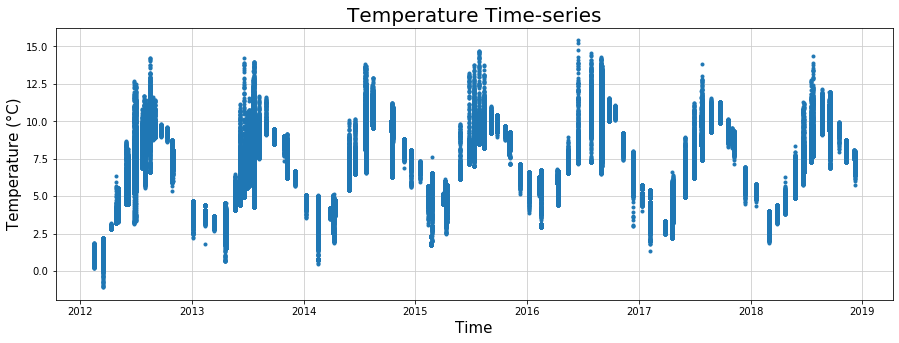

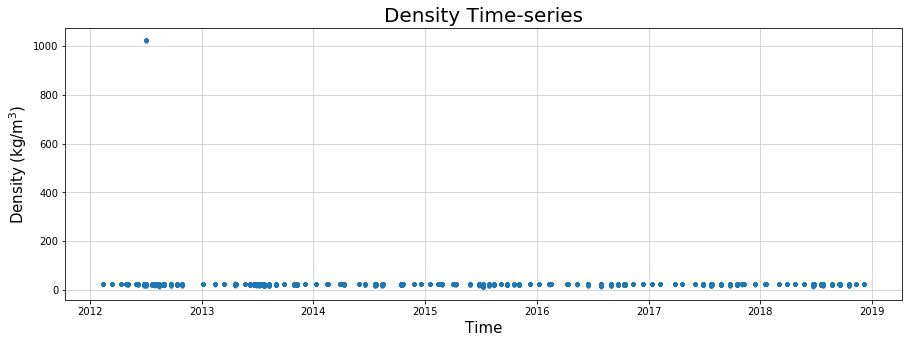

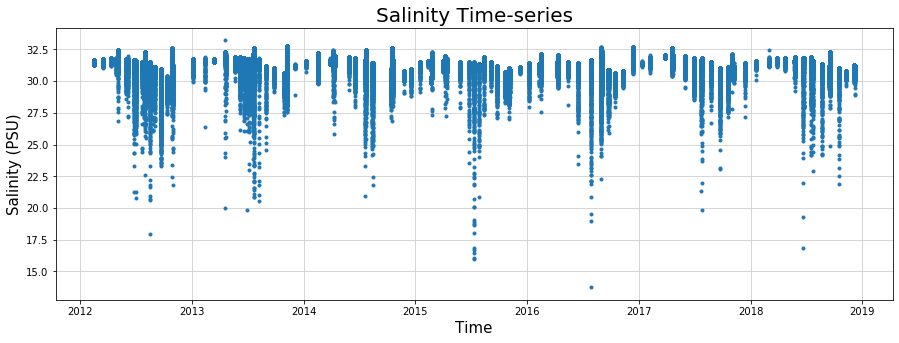

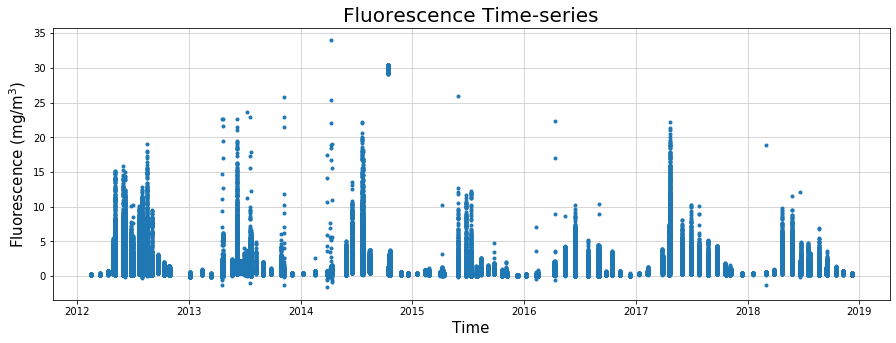

In [13]:
titles = ['Temperature Time-series', 'Density Time-series', 'Salinity Time-series', 
          'Fluorescence Time-series']
labels = ['Temperature (\u00B0C)', 'Density (kg/m$^3$)', 'Salinity (PSU)', 'Fluorescence (mg/m$^3$)']
names = ['temperature_deg_c', 'density_sig_tht_kg_m3', 'salinity_psu', 'fluorescence_mg_m3']
for title, label, name in zip(titles, labels, names):
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    ax = set_plot_defaults(ax, title, 'Time', label)
    ax.plot(df.index.to_pydatetime(), df[name].values, '.')
    plt.show()

Clearly the density values have one or more outliers that appear as if they haven't had the complete sigma-theta transformation applied (i.e. they never had 1000 subtracted from their values). Lets plot them again, subtracting 1000 from anything greater than 1000 km/m$^3$.

In [14]:
df[df['density_sig_tht_kg_m3'] > 1000]

,transect,station,latitude,longitude,depth_m,temperature_deg_c,density_sig_tht_kg_m3,salinity_psu,fluorescence_mg_m3,cast
time,,,,,,,,,,
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,8.0,8.4253,1024.3218,31.2701,4.6644,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,7.0,8.5086,1024.2512,31.2017,4.7358,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,5.0,8.6926,1024.0963,31.0503,4.0978,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,9.0,8.3411,1024.3648,31.3035,4.6080,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,6.0,8.5971,1024.1794,31.1325,4.5792,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,4.0,8.7612,1024.0098,30.9588,3.2357,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,3.0,8.8453,1023.8675,30.7989,2.1586,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,2.0,8.9956,1023.5789,30.4646,1.5384,149
2012-07-02 08:25:00,Subbays,JBayA,59.4708,-151.5368,1.0,9.0852,1023.3894,30.2454,1.3921,149


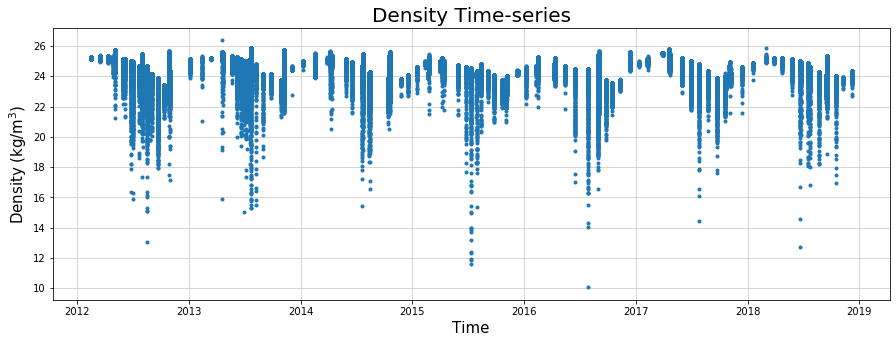

In [15]:
dens = 'density_sig_tht_kg_m3'
df[dens] = df[dens].where(df[dens] < 1000, df[dens] - 1000)
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(111)
ax = set_plot_defaults(ax, 'Density Time-series', 'Time', 'Density (kg/m$^3$)')
ax.plot(df.index.to_pydatetime(), df['density_sig_tht_kg_m3'].values, '.')
plt.show()

# Create temporal contour plots

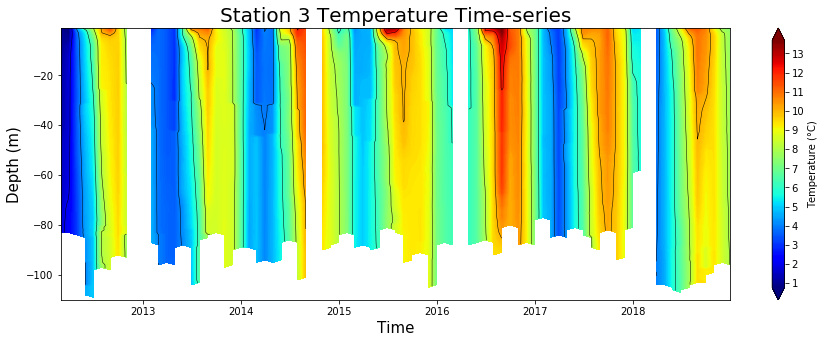

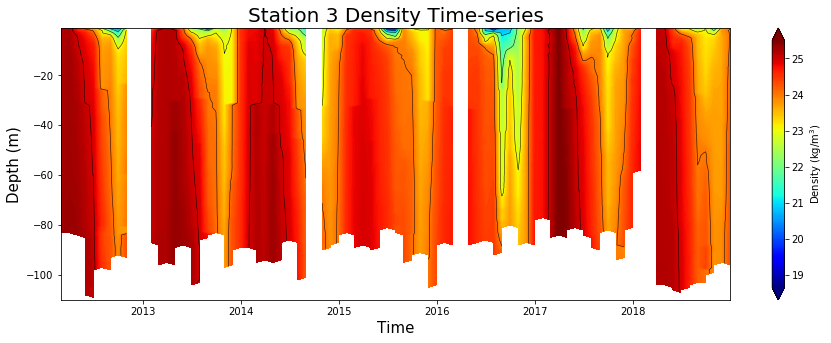

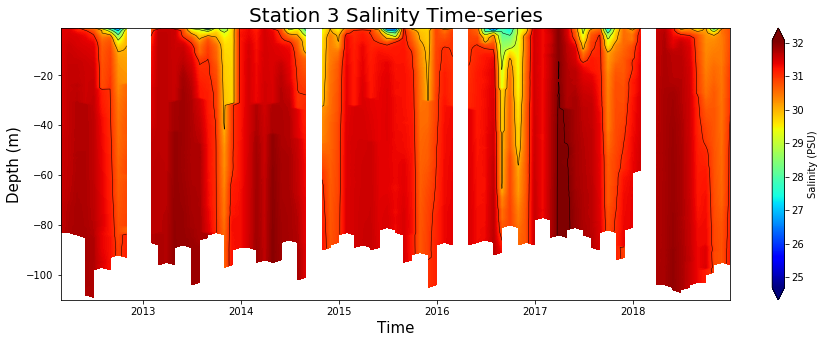

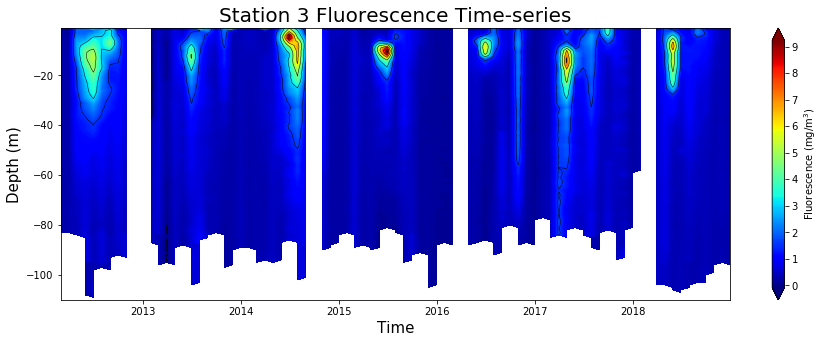

In [16]:
titles = ['Temperature Time-series', 'Density Time-series', 'Salinity Time-series', 
          'Fluorescence Time-series']
labels = ['Temperature (\u00B0C)', 'Density (kg/m$^3$)', 'Salinity (PSU)', 'Fluorescence (mg/m$^3$)']
names = ['temperature_deg_c', 'density_sig_tht_kg_m3', 'salinity_psu', 'fluorescence_mg_m3']
station = '3'
for title, label, name in zip(titles, labels, names):
    vals = df[name][df['station'] == station]
    levels = np.arange(floor(min(vals)), ceil(max(vals)), 1)
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    pv = df[df['station'] == station].pivot(columns='depth_m', values=name)
    pv = pv.resample('M').mean()
    ax = set_plot_defaults(ax, 'Station ' + station + ' ' +title, 'Time', 'Depth (m)', grid=False)
    ct = ax.contour(pv.index.to_pydatetime(), -pv.columns, pv.values.T, colors='black', linewidths=0.5)
    cf = ax.contourf(pv.index.to_pydatetime(), -pv.columns, pv.values.T, 256, extend='both', cmap='jet')
    cb = plt.colorbar(cf, ax=ax, label=label, ticks=levels)
    fig.savefig('/data/user/Figures/CTD contours_Axiom/output/station_' + station + '_' + name + '.jpg')
    plt.show()


Think this through. What is it that I need to do? I want to plot the actual profiles themselves on the plots. I guess that's not too hard to do assuming I can ge the data in the right format. It would be cool to have the profiles exetend all the way down to the bottom of the plot, but just have them be a lot light where the profile ends. Although I guess if I have the bathymetry down there that might not work. So scrap that for now. What I need to do is get those data into a similar format as the depth stuff. Right. I need a bunch of line segments with date on the x and depth on the y going from 0 to d. Could I just extract unique dates and the max depth for that date and then pair those with a starting depth of zero. Well, how about first I just try plotting a single line. Pick a date, get it into the right format, then plot it. 

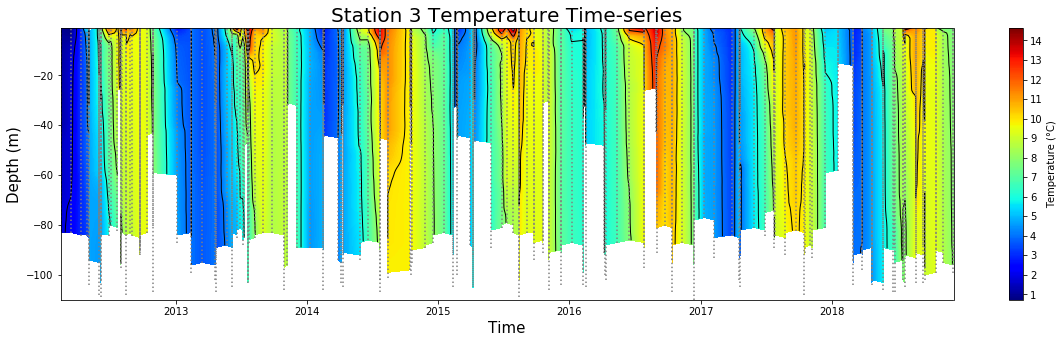

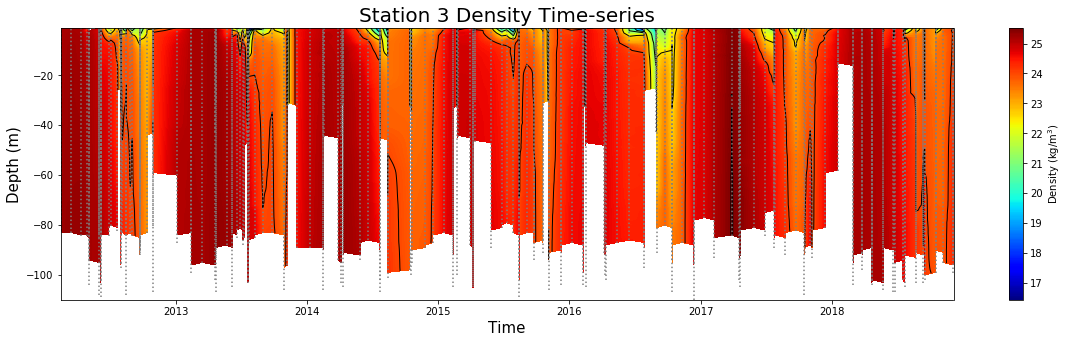

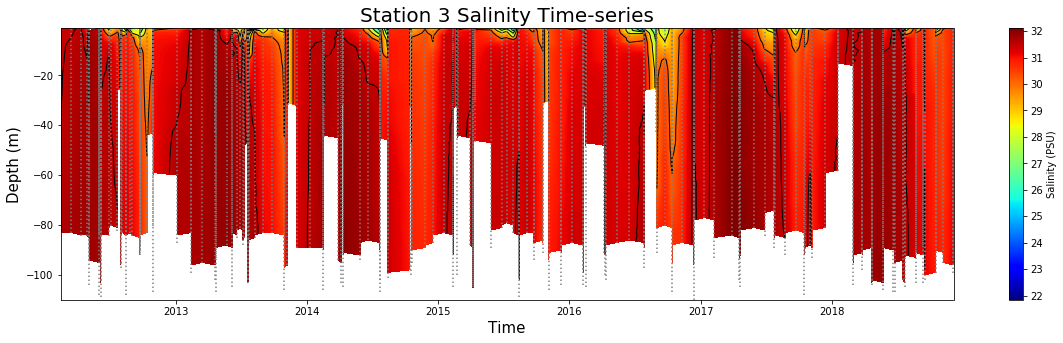

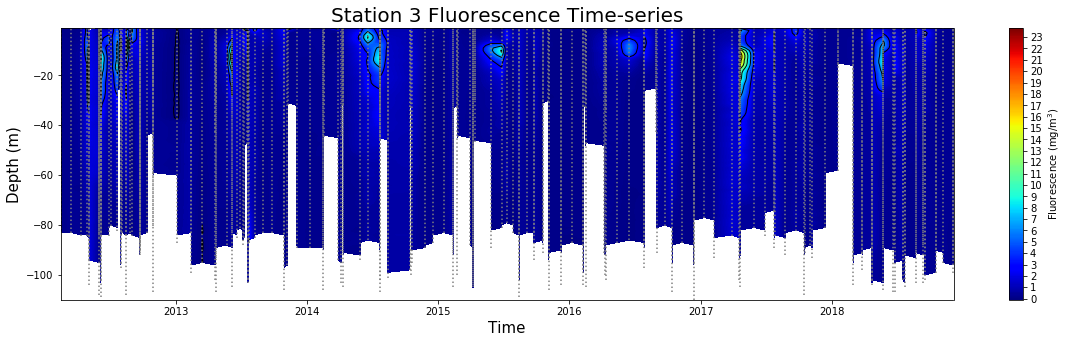

In [17]:
import datetime
import scipy.ndimage


date_time = pd.to_datetime('2016-07-01')
titles = ['Temperature Time-series', 'Density Time-series', 'Salinity Time-series', 
          'Fluorescence Time-series']
labels = ['Temperature (\u00B0C)', 'Density (kg/m$^3$)', 'Salinity (PSU)', 'Fluorescence (mg/m$^3$)']
names = ['temperature_deg_c', 'density_sig_tht_kg_m3', 'salinity_psu', 'fluorescence_mg_m3']
station = '3'
for title, label, name in zip(titles, labels, names):
    station_df = df[df['station'] == station].copy()
    times = station_df.index.unique()
    depths = []
    for time in times:
        depths.append(max(station_df['depth_m'].loc[time]))
    vals = df[name][df['station'] == station]
    levels = np.arange(floor(min(vals)), ceil(max(vals)), 1)
    fig = plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)
    pv = df[df['station'] == station].pivot(columns='depth_m', values=name)
#     pv = scipy.ndimage.zoom(pv, 3)
#     pv = pv.resample('2M').mean()
    ax = set_plot_defaults(ax, 'Station ' + station + ' ' +title, 'Time', 'Depth (m)', grid=False)
    ct = ax.contour(pv.index.to_pydatetime(), -pv.columns, pv.values.T, colors='black', linewidths=1.0)
    cf = ax.contourf(pv.index.to_pydatetime(), -pv.columns, pv.values.T, 256, extend='neither', cmap='jet')
    cb = plt.colorbar(cf, ax=ax, label=label, ticks=levels)
    ylim = -(ax.get_ylim()[0])
    for depth, time in zip(depths, times):
        ymin = 1 - (depth / ylim)
        ax.axvline(time, ymin=ymin, color='gray', linestyle=':')
# #     fig.savefig('/data/user/Figures/CTD contours_Axiom/output/station_' + station + '_' + name + '.jpg')
    plt.show()


## Create spatial contour plots

### Calculate and attribute distance from origin of transect for each station 

What to do here. For each transect I need to start with the origin node and set that to zero. Then once I know that I just go through each other transect and each station and calculate distance to the origin node. Not too bad.

In order to make the transects work we need to make sure that we know what all the stations are that are in each transect. Some of these stations look like they're part of mulitple transects, which makes things more challenging. Let's take a look.

In [18]:
ambig_transects = ['9andTutka', '4 (part of multiple transects)', '9 (part of multiple transects)',
                   'AlongBay (part of multiple transects)']
for t in ambig_transects:
    print('Stations along ' + t + ':')
    stations = df['station'][df['transect'] == t].unique()
    for s in stations:
        print(s)

Stations along 9andTutka:
TutkaC
TutkaA
TutkaB
1
2
3
4
5
6
7
8
9
10
9extra
Stations along 4 (part of multiple transects):
4
Stations along 9 (part of multiple transects):
6
10
Stations along AlongBay (part of multiple transects):
Nanwalek
Dangerous Cape
Pogi Point
Seldovia West
Halfway to Seldovia
KB02
KB04
KB05


In [19]:
for t in df['transect'].unique():
    print(t)

9
4
3
6
Subbays
AlongBay
7
9andTutka
4 (part of multiple transects)
9 (part of multiple transects)
AlongBay (part of multiple transects)
1


In [20]:
print(df['station'][df['transect'] == '4'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


In [21]:
# Let's check out where this station is, hopefully mapping it and sticking them up on a map to see
# if they would be good candidates

stations = df['station'][df['transect'] == '4'].unique()
for s in stations:
    x = df['longitude'][df['station'] == s].unique()
    y = df['latitude'][df['station'] == s].unique()
    print(s, ":", end=' ')
    print(x, ',', end=' ')
    print(y, ',', end=' ')

1 : [-151.3581 -151.3575 -151.3585 -151.3573 -151.65   -152.5659 -151.9244
 -151.358        nan -151.6492 -151.6493 -151.3583 -151.3592 -152.5668
 -151.3591 -151.356  -151.3567 -151.3571 -151.3574 -153.3004 -151.9283
 -152.5664 -151.6504 -151.3584 -151.3579 -151.3576 -151.9248 -153.3008
 -152.5665 -151.649  -151.3545 -151.3582 -151.3587 -151.3586 -151.359
 -153.3022 -151.6487 -151.9249 -151.3542 -151.354  -151.6505 -151.9254
 -152.5667 -152.5651 -153.302  -151.9224 -153.3017 -152.5669 -151.3549
 -151.6491 -152.5674 -151.9273 -151.6498 -152.5663 -151.9243 -151.3552
 -151.3626 -151.3551 -151.9262 -153.3015 -151.3553 -152.5666 -153.3018
 -151.3628 -151.6502 -151.357  -151.3572 -151.6481 -152.5671 -151.3577
 -151.6486 -151.3563 -152.5661 -151.9241 -153.3073 -151.9251 -152.5656
 -153.2996 -151.9238 -151.9231 -151.656  -152.5672 -153.3016 -151.0035
 -151.6497 -151.9271 -151.3588 -151.3558 -151.6499 -151.9234 -151.8872
 -151.8877 -151.8839 -151.8892 -151.638  -151.9235 -151.8881 -151.4075
 -1

 59.1607 59.576 ] , 7 : [-151.3895 -151.3897 -151.3903       nan -152.308  -152.1727 -151.6503
 -151.3896 -151.3888 -151.6498 -151.6491 -151.3902 -151.3892 -152.3082
 -152.1711 -151.3898 -151.3901 -151.3894 -151.39   -151.3905 -152.9774
 -152.172  -152.3089 -151.6497 -151.3907 -151.3906 -151.649  -152.9805
 -152.3081 -151.6501 -151.65   -151.3893 -151.388  -152.9766 -152.3059
 -151.6504 -152.1716 -151.3876 -151.389  -151.6505 -152.3095 -151.3883
 -151.6517 -152.3067 -152.976  -151.3899 -152.1722 -152.9769 -152.307
 -151.6506 -151.387  -151.6492 -152.3087 -152.1742 -152.9762 -152.3078
 -152.9763 -151.3875 -152.3092 -152.1719 -152.977  -151.648  -151.3877
 -152.3079 -152.9773 -151.6493 -152.3086 -151.6512 -151.6499 -151.3873
 -151.3914 -152.1718 -151.3858 -151.6496 -151.3904 -152.1729 -151.6495
 -151.3891 -151.6507 -151.3485 -151.3499 -151.3515 -151.3491 -151.3505
 -151.3502 -151.3495 -151.3496 -151.3503 -151.3486] , [59.5862 59.586      nan 59.919  59.1476 59.5927 59.5858 59.5853 59.592

Looks like each cast has its own lat and long in addition to the master list. Clearly for this I need to use the coordinates for the master list or things are going to be all wonky. 

In [22]:
loc_fn = '/data/user/Data, 2012-2016/CTD Data/MasterStationLocations.xlsx'
loc_df = pd.read_excel(loc_fn)
print(loc_df[loc_df['Line'] == 4])

   Line Station New Station Name Match_Name  Lon_decDegree  Lon min  \
17    4      56              4_1        4_1        -151.65     39.0   
18    4      57              4_2        4_2        -151.65     39.0   
19    4      58              4_3        4_3        -151.65     39.0   
20    4      59              4_4        4_4        -151.65     39.0   
21    4      60              4_5        4_5        -151.65     39.0   
22    4      61              4_6        4_6        -151.65     39.0   
23    4      62              4_7        4_7        -151.65     39.0   
24    4      63              4_8        4_8        -151.65     39.0   
25    4      64              4_9        4_9        -151.65     39.0   
26    4      65             4_10       4_10        -151.65     39.0   

    Lat_decDegree  Lat min  Depth_m Plankton  Number  \
17      59.491667     29.5     21.0      NaN    56.0   
18      59.508333     30.5    102.0        Y    57.0   
19      59.525000     31.5    107.0      NaN    58

In [23]:
!conda install -y contextily

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda/envs/py37

  added / updated specs:
    - contextily


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.68.0           |    h11c811c_1000        20.5 MB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    contextily-1.0rc2          |             py_0          22 KB  conda-forge
    libkml-1.3.0               |    h328b03d_1009         637 KB  conda-forge
    mercantile-1.1.2           |             py_0          14 KB  conda-forge
    ------------------------------------------------------------
               

In [24]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))


/opt/conda/envs/py37/lib/python3.7/site-packages/contextily/tile.py:199: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


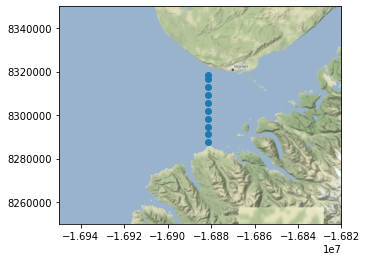

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

tran4 = loc_df[loc_df['Line'] == 4]
gdf = gpd.GeoDataFrame(tran4, geometry=gpd.points_from_xy(tran4['Lon_decDegree'], tran4['Lat_decDegree']))
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)
# print(gdf.geometry)
# gdf.plot()
f, ax = plt.subplots(1)
gdf.plot(ax=ax)
ax.set_xlim([-16950000, -16820000])
ax.set_ylim([8250000, 8350000])
add_basemap(ax, zoom=10)
plt.show()

Okay, that's a good transect, let's try that out. What needs to happen is that the individual observations need to be joined with the static station locations. Then we need to decide on an origin (1, naturally), then calculate each other station's distance to that in meters/km or whatever. Or probably do that before the join, then join. Then plot, but just use that distance as the x axis. Simple.

In [26]:
tran4 = loc_df[loc_df['Line'] == 4].copy()
tran4.reset_index(inplace=True)
tran4['distance_to_origin_m'] = np.nan
tran4['distance_to_origin_m'][tran4['New Station Name'] == '4_1'] = 0.0
tran4 = gpd.GeoDataFrame(tran4, geometry=gpd.points_from_xy(tran4['Lon_decDegree'], tran4['Lat_decDegree']))
tran4.crs = {'init' :'epsg:4326'}
tran4 = tran4.to_crs(epsg=3338)
tran4['distance_to_origin_m'][1:] = tran4['geometry'][1:].distance(tran4['geometry'][0])

/opt/conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
df['New Station Name'] = df['transect'] + "_" + df['station']
df.reset_index(inplace=True)
df.head()

,time,transect,station,latitude,longitude,depth_m,temperature_deg_c,density_sig_tht_kg_m3,salinity_psu,fluorescence_mg_m3,cast,New Station Name
0,2012-02-14 12:27:00,9,1,59.57,-151.3581,1.0,0.8241,25.1623,31.4015,0.1802,264,9_1
1,2012-02-14 12:27:00,9,1,59.57,-151.3581,31.0,1.5817,25.2767,31.6000,0.2406,264,9_1
2,2012-02-14 12:27:00,9,1,59.57,-151.3581,32.0,1.5994,25.2756,31.6001,0.2317,264,9_1
3,2012-02-14 12:27:00,9,1,59.57,-151.3581,33.0,1.6197,25.2772,31.6036,0.2304,264,9_1
4,2012-02-14 12:27:00,9,1,59.57,-151.3581,34.0,1.6403,25.2784,31.6069,0.2360,264,9_1


In [28]:
transect4 = df[df['transect'] == '4'].copy()
transect4_join = transect4.merge(pd.DataFrame(tran4), on='New Station Name', how='left')
transect4_join.set_index('distance_to_origin_m', inplace=True)
transect4_join.head()

,time,transect,station,latitude,longitude,depth_m,temperature_deg_c,density_sig_tht_kg_m3,salinity_psu,fluorescence_mg_m3,...,Match_Name,Lon_decDegree,Lon min,Lat_decDegree,Lat min,Depth_m,Plankton,Number,Comments,geometry
distance_to_origin_m,,,,,,,,,,,,,,,,,,,,,
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,17.0,4.8253,25.0771,31.6981,4.1677,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,11.0,4.8846,25.0680,31.6946,4.5452,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,16.0,4.8335,25.0748,31.6964,4.2694,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,15.0,4.8438,25.0712,31.6932,4.2711,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,14.0,4.8491,25.0694,31.6917,4.4290,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)


In [29]:
transect4_join['time'].dt.date.unique()

array([datetime.date(2012, 5, 2), datetime.date(2012, 5, 31),
       datetime.date(2012, 6, 5), datetime.date(2012, 7, 31),
       datetime.date(2012, 8, 15), datetime.date(2012, 10, 29),
       datetime.date(2013, 2, 12), datetime.date(2013, 4, 21),
       datetime.date(2013, 6, 6), datetime.date(2013, 7, 19),
       datetime.date(2013, 10, 29), datetime.date(2014, 2, 15),
       datetime.date(2014, 4, 11), datetime.date(2014, 7, 21),
       datetime.date(2014, 8, 13), datetime.date(2014, 10, 13),
       datetime.date(2015, 2, 12), datetime.date(2015, 4, 8),
       datetime.date(2015, 8, 14), datetime.date(2015, 9, 24),
       datetime.date(2015, 10, 19), datetime.date(2015, 11, 3),
       datetime.date(2015, 11, 4), datetime.date(2015, 12, 10),
       datetime.date(2016, 2, 9), datetime.date(2016, 4, 11),
       datetime.date(2016, 7, 27), datetime.date(2016, 10, 13),
       datetime.date(2016, 12, 13), datetime.date(2017, 4, 20),
       datetime.date(2017, 7, 25), datetime.date(2017

In [30]:
t4_day1 = transect4_join[transect4_join['time'].dt.date == transect4_join['time'].dt.date.unique()[0]].copy()
t4_day1.tail()

,time,transect,station,latitude,longitude,depth_m,temperature_deg_c,density_sig_tht_kg_m3,salinity_psu,fluorescence_mg_m3,...,Match_Name,Lon_decDegree,Lon min,Lat_decDegree,Lat min,Depth_m,Plankton,Number,Comments,geometry
distance_to_origin_m,,,,,,,,,,,,,,,,,,,,,
15840.952593,2012-05-02 15:37:00,4,10,59.633,-151.65,24.0,3.9206,25.2352,31.7827,1.9919,...,4_10,-151.65,39.0,59.633333,38.0,20.0,NaN,65.0,North side. Shorter dist on sta 4-10. Stops ...,POINT (132058.099003959 1073624.187152365)
15840.952593,2012-05-02 15:37:00,4,10,59.633,-151.65,23.0,3.9253,25.2350,31.7830,2.0950,...,4_10,-151.65,39.0,59.633333,38.0,20.0,NaN,65.0,North side. Shorter dist on sta 4-10. Stops ...,POINT (132058.099003959 1073624.187152365)
15840.952593,2012-05-02 15:37:00,4,10,59.633,-151.65,29.0,3.8812,25.2376,31.7810,1.5841,...,4_10,-151.65,39.0,59.633333,38.0,20.0,NaN,65.0,North side. Shorter dist on sta 4-10. Stops ...,POINT (132058.099003959 1073624.187152365)
15840.952593,2012-05-02 15:37:00,4,10,59.633,-151.65,10.0,4.9622,25.0856,31.7274,15.1536,...,4_10,-151.65,39.0,59.633333,38.0,20.0,NaN,65.0,North side. Shorter dist on sta 4-10. Stops ...,POINT (132058.099003959 1073624.187152365)
15840.952593,2012-05-02 15:37:00,4,10,59.633,-151.65,64.0,3.5173,25.2814,31.7937,0.4370,...,4_10,-151.65,39.0,59.633333,38.0,20.0,NaN,65.0,North side. Shorter dist on sta 4-10. Stops ...,POINT (132058.099003959 1073624.187152365)


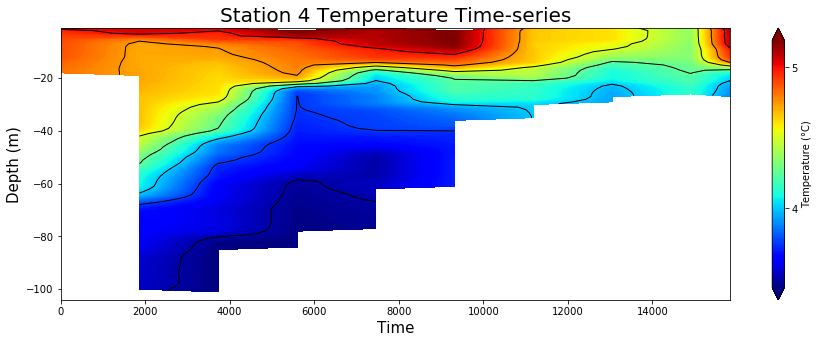

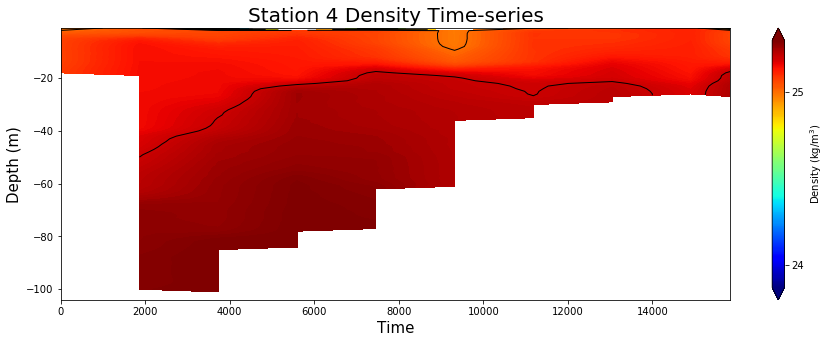

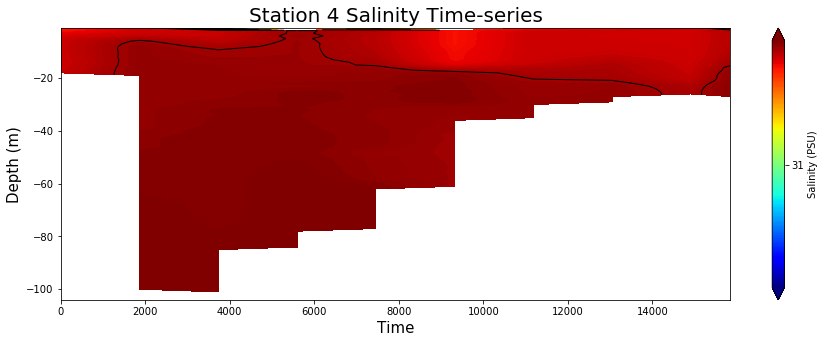

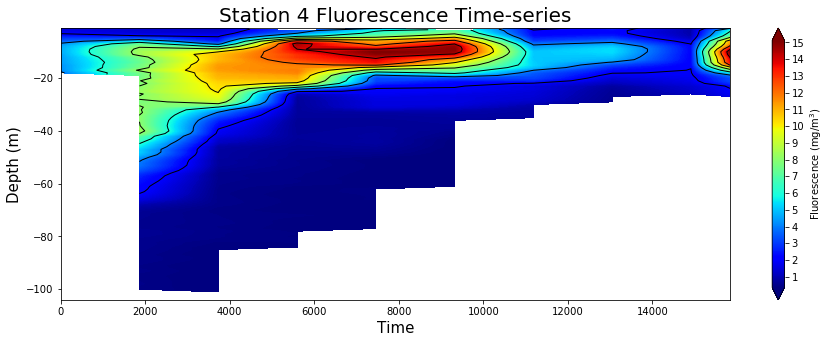

In [31]:
titles = ['Temperature Time-series', 'Density Time-series', 'Salinity Time-series', 
          'Fluorescence Time-series']
labels = ['Temperature (\u00B0C)', 'Density (kg/m$^3$)', 'Salinity (PSU)', 'Fluorescence (mg/m$^3$)']
names = ['temperature_deg_c', 'density_sig_tht_kg_m3', 'salinity_psu', 'fluorescence_mg_m3']
station = '4'
for title, label, name in zip(titles, labels, names):
    vals = t4_day1[name]
    levels = np.arange(floor(min(vals)), ceil(max(vals)), 1)
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    pv = t4_day1.pivot(columns='depth_m', values=name)
#     pv = pv.resample('M').mean()
    ax = set_plot_defaults(ax, 'Station ' + station + ' ' +title, 'Time', 'Depth (m)', grid=False)
    ct = ax.contour(pv.index, -pv.columns, pv.values.T, colors='black', linewidths=1.0)
    cf = ax.contourf(pv.index, -pv.columns, pv.values.T, 256, extend='both', cmap='jet')
    cb = plt.colorbar(cf, ax=ax, label=label, ticks=levels)
#     fig.savefig('/data/user/Figures/CTD contours_Axiom/output/station_' + station + '_' + name + '.jpg')
    plt.show()


## Test out adding bathymetry profile with code from [Will's notebook](https://researchworkspace.com/file/3046107/extract-bathymetric-profile.ipynb)

In [32]:
import numpy as np
import pandas as pd
import shapely
from shapely.geometry import Point, LineString, MultiPoint
import rasterio
import cartopy
from tqdm import trange
import sys
import glob
import os
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean.cm as cm
import geopandas as gpd

In [33]:
gebco = '/data/models/12ba2388-de4a-11e4-a7c0-00265529168c/GEBCO_2014_2D_-180.0_0.0_-90.0_90.0.nc'
with netCDF4.Dataset(gebco) as netcdf:
#     print(netcdf.variables)
    x = np.array(netcdf.variables['lon'][:])
    y = np.array(netcdf.variables['lat'][:])
    z = np.squeeze(np.array(netcdf.variables['elevation'][:]))
#     projection = netcdf.variables['albers_conical_equal_area'].spatial_ref

### Will's functions

In [34]:
## cartopy format
crs = cartopy.crs.epsg(3338)

## geopandas format
# Lon/Lat CRS
lonlat_crs = {'init': 'epsg:4326'}

# Equal area projection
proj_crs={'init': 'epsg:3338'}

In [35]:
def path_to_points(path, resolution=False, npoints=False, pin_end=True):

    if resolution or npoints:
        # in this case, divide the path equally by the value
        if npoints:
            interpolated_path = [path.interpolate((i/(npoints-1)), normalized=True) for i in range(0, npoints)]

        # otherwise, use the value as a distance to increment the path
        if resolution:
            npoints = int(path.length / resolution)
            interpolated_path = [path.interpolate((i*resolution)) for i in range(0, npoints+1)]

            # Add the last point, regardless of distance
            if pin_end:
                interpolated_path.append(Point(list(path.coords)[-1]))

        points = gpd.GeoDataFrame(crs=proj_crs,geometry=interpolated_path)
    
        return points
    
    else:
        return False

def get_lon(point):
    return point.x

def get_lat(point):
    return point.y

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def point_to_index(point):
    # x
    x_index = find_nearest(x, point.x)
    
    #y
    y_index = find_nearest(y, point.y)
    
    return (y_index, x_index)

def get_bathy_value(point):
    return z[point_to_index(point)]

def get_distance(points):
    
    # fast!
    xs = np.array([points['geometry'].iloc[i].x for i in range(len(points))])
    ys = np.array([points['geometry'].iloc[i].y for i in range(len(points))])

    distances = np.empty(len(xs))

    for i in range(0, len(xs)):
        distances[i] = np.sqrt((xs[i]-xs[0])**2 + (ys[i]-ys[0])**2)

    # looks better but slooow
    # points['distance'] = 0
    # for i in trange(1, len(points)):
    #     points['distance'].loc[i] = points['geometry'].iloc[i].distance(points['geometry'].iloc[0])
    
    return distances

def get_profile(start_profile, end_profile, resolution=False, plot=False, save=False, npoints=False, pin_end=True):

    # If we want equal distance (in meters) between our profiles, we need to work in projected coords
    # geopandas converts easily
    pathdf = gpd.GeoDataFrame(crs=lonlat_crs, geometry=[start_profile, end_profile])
    pathdf = pathdf.to_crs(proj_crs)

    path = LineString([pathdf['geometry'].loc[0], pathdf['geometry'].loc[1]])
    
    if not resolution and not npoints:
            npoints=100
            print('Using ' + str(npoints) + ' points')
    
    points = path_to_points(path, resolution=resolution, npoints=npoints, pin_end=pin_end)
    points['longitude'] = points.to_crs(lonlat_crs)['geometry'].apply(get_lon)
    points['latitude'] = points.to_crs(lonlat_crs)['geometry'].apply(get_lat)
    
    points['distance'] = get_distance(points)
    points = points.to_crs(lonlat_crs)
    points['bathymetry'] = points['geometry'].apply(get_bathy_value)
    
    if plot:
        create_plot(points)
    
    if save:
        points.rename(columns={'distance':'distance (m)', 'bathymetry':'depth (m)'}).drop(columns=['geometry']).to_csv('output.csv', index=False)
        
    return points

In [36]:
start_profile = Point(t4_day1['longitude'][t4_day1['station'] == '1'].unique(), 
                      t4_day1['latitude'][t4_day1['station'] == '1'].unique())

end_profile = Point(t4_day1['longitude'][t4_day1['station'] == '10'].unique(), 
                      t4_day1['latitude'][t4_day1['station'] == '10'].unique())

print(start_profile)
print(end_profile)

POINT (-151.65 59.492)
POINT (-151.65 59.633)


In [37]:
profile_df = pd.DataFrame(get_profile(start_profile, end_profile, resolution=1000))
profile_df.head(20)

,geometry,longitude,latitude,distance,bathymetry
0,POINT (-151.65 59.49199999999996),-151.65,59.492000,0.000000,-24.0
1,POINT (-151.65 59.50094330095045),-151.65,59.500943,1000.000000,-84.0
2,POINT (-151.65 59.50988656898694),-151.65,59.509887,2000.000000,-104.0
3,POINT (-151.65 59.51882980431317),-151.65,59.518830,3000.000000,-105.0
4,POINT (-151.65 59.52777300713258),-151.65,59.527773,4000.000000,-97.0
5,POINT (-151.65 59.53671617764905),-151.65,59.536716,5000.000000,-85.0
6,POINT (-151.65 59.54565931606661),-151.65,59.545659,6000.000000,-82.0
7,POINT (-151.65 59.5546024225892),-151.65,59.554602,7000.000000,-78.0
8,POINT (-151.65 59.5635454974212),-151.65,59.563545,8000.000000,-74.0
9,POINT (-151.65 59.57248854076691),-151.65,59.572489,9000.000000,-65.0


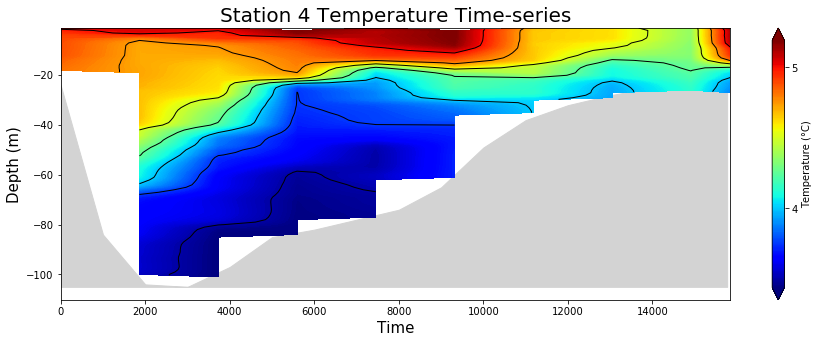

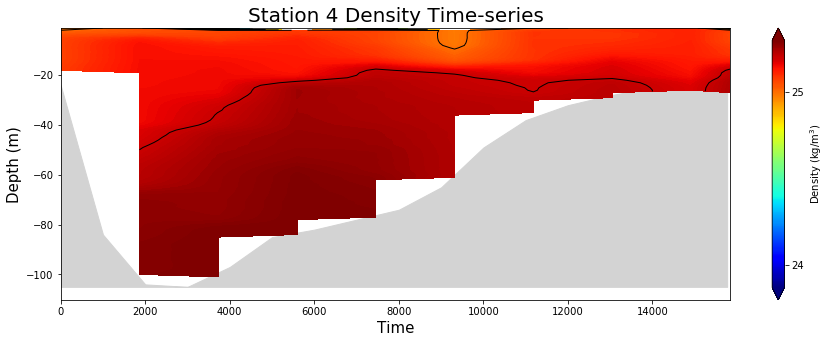

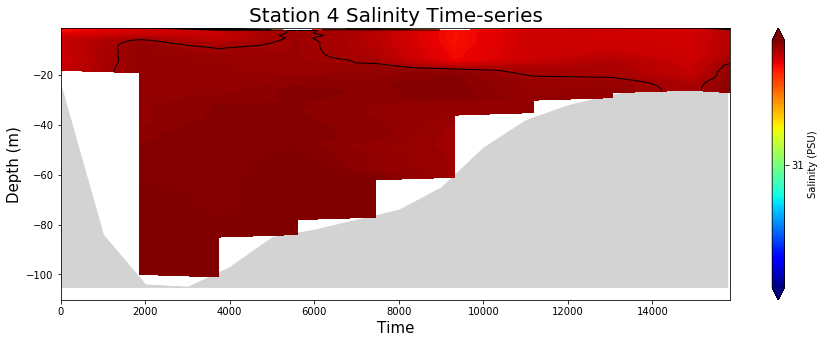

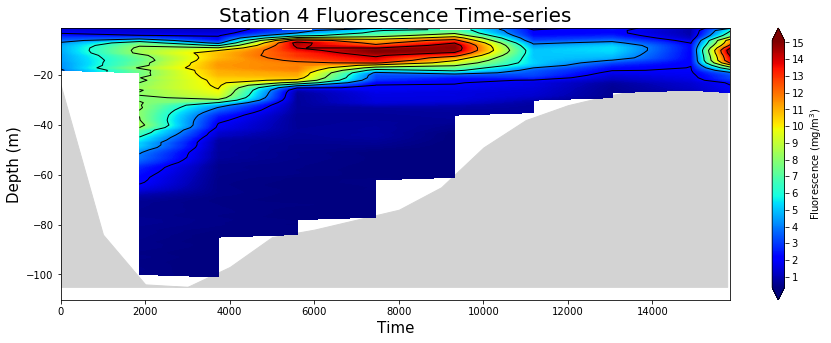

In [38]:
titles = ['Temperature Time-series', 'Density Time-series', 'Salinity Time-series', 
          'Fluorescence Time-series']
labels = ['Temperature (\u00B0C)', 'Density (kg/m$^3$)', 'Salinity (PSU)', 'Fluorescence (mg/m$^3$)']
names = ['temperature_deg_c', 'density_sig_tht_kg_m3', 'salinity_psu', 'fluorescence_mg_m3']
station = '4'
for title, label, name in zip(titles, labels, names):
    vals = t4_day1[name]
    levels = np.arange(floor(min(vals)), ceil(max(vals)), 1)
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    pv = t4_day1.pivot(columns='depth_m', values=name)
#     pv = pv.resample('M').mean()
    ax = set_plot_defaults(ax, 'Station ' + station + ' ' +title, 'Time', 'Depth (m)', grid=False)
    ax.plot(profile_df['distance'], profile_df['bathymetry'], lw=0)
    ax.fill_between(profile_df['distance'], profile_df['bathymetry'], min(profile_df['bathymetry']), color='lightgray')
    ct = ax.contour(pv.index, -pv.columns, pv.values.T, colors='black', linewidths=1.0)
    cf = ax.contourf(pv.index, -pv.columns, pv.values.T, 256, extend='both', cmap='jet')
    cb = plt.colorbar(cf, ax=ax, label=label, ticks=levels)
#     fig.savefig('/data/user/Figures/CTD contours_Axiom/output/station_' + station + '_' + name + '.jpg')
    plt.show()


# Test out creating a grid of subplots

In [39]:
t4_12 = transect4_join[transect4_join['time'].dt.year == 2012]
t4_12.head()

,time,transect,station,latitude,longitude,depth_m,temperature_deg_c,density_sig_tht_kg_m3,salinity_psu,fluorescence_mg_m3,...,Match_Name,Lon_decDegree,Lon min,Lat_decDegree,Lat min,Depth_m,Plankton,Number,Comments,geometry
distance_to_origin_m,,,,,,,,,,,,,,,,,,,,,
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,17.0,4.8253,25.0771,31.6981,4.1677,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,11.0,4.8846,25.0680,31.6946,4.5452,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,16.0,4.8335,25.0748,31.6964,4.2694,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,15.0,4.8438,25.0712,31.6932,4.2711,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)
0.0,2012-05-02 13:16:00,4,1,59.492,-151.65,14.0,4.8491,25.0694,31.6917,4.4290,...,4_1,-151.65,39.0,59.491667,29.5,21.0,NaN,56.0,South side. Stations are all 1 nautical mile ...,POINT (132618.5248332077 1057793.151117096)


In [40]:
dates = t4_12['time'].dt.date.unique()
print(dates)

[datetime.date(2012, 5, 2) datetime.date(2012, 5, 31)
 datetime.date(2012, 6, 5) datetime.date(2012, 7, 31)
 datetime.date(2012, 8, 15) datetime.date(2012, 10, 29)]


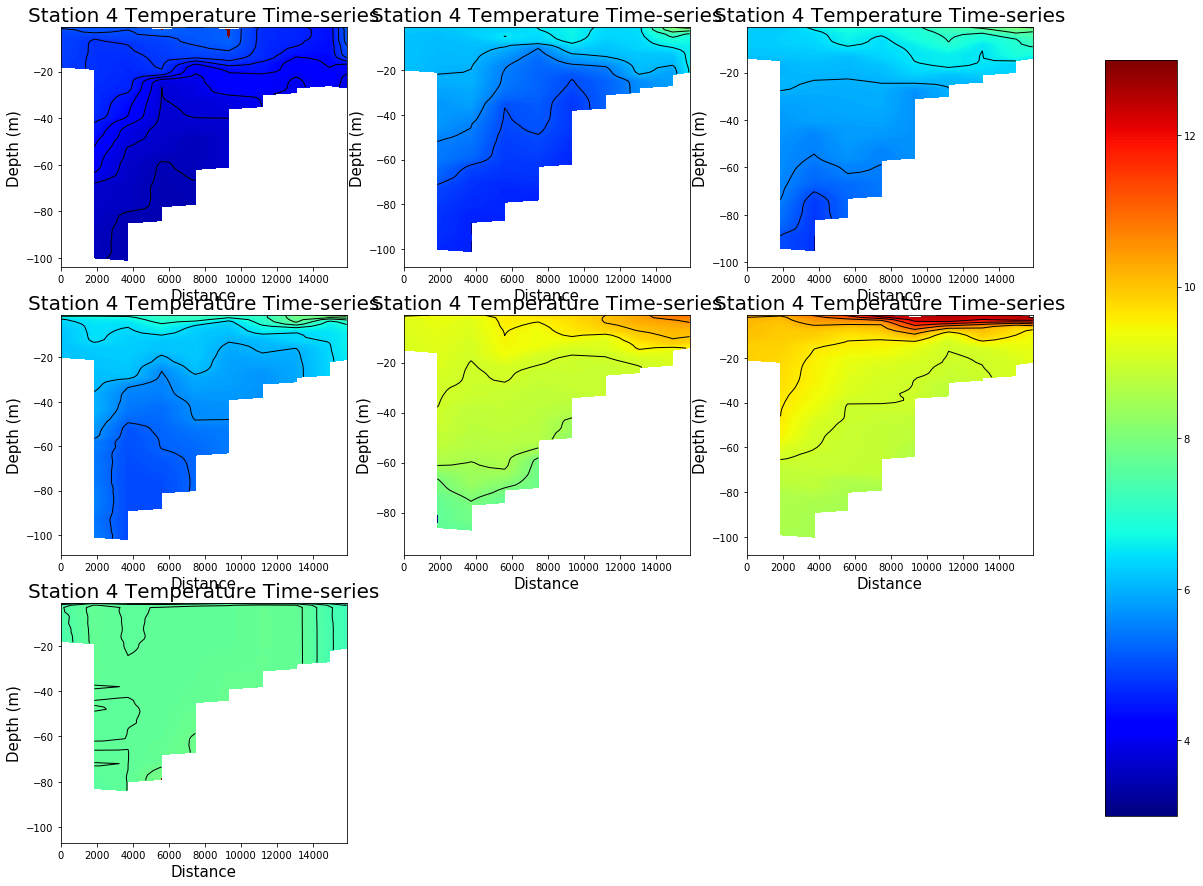

In [41]:
from matplotlib import cm
from matplotlib import colors

vmin = floor(min(t4_12['temperature_deg_c']))
vmax = ceil(max(t4_12['temperature_deg_c']))

# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
levels = np.arange(vmin, vmax, 1)
# print(fig.axes)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
fig = plt.figure(figsize=(20, 15))
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)
row_idx=0
col_idx=0

plot_idx=1
# for ax, date in zip(axes.flat, dates):
for date in dates:
#     print('Plot index:', str(plot_idx))
    t4_12_date = t4_12[t4_12['time'].dt.date == date]
    n_stations = len(t4_12_date.index.unique())
    n_casts = len(t4_12_date['cast'].unique())
    first_cast_idx = 0
    last_cast_idx = n_stations
    while n_casts > 0:
        casts = list(t4_12_date['cast'].unique()[first_cast_idx:last_cast_idx])
        t4_12_date_casts = t4_12_date[t4_12_date['cast'].isin(casts)]
        t4_12_date_casts.to_csv(str(t4_12_date_casts['time'].iloc[0]) + '.csv')
        vals = t4_12_date_casts['temperature_deg_c']
#         fig = plt.figure(figsize=(15, 20))
        ax = plt.subplot(3, 3, plot_idx)
#         print(type(ax[0]))
        pv = t4_12_date_casts.pivot(columns='depth_m', values='temperature_deg_c')
        ax = set_plot_defaults(ax, 'Station 4 Temperature Time-series', 'Distance', 'Depth (m)', grid=False)
        ct = ax.contour(pv.index, -pv.columns, pv.values.T, colors='black', linewidths=1.0)
        cf = ax.contourf(pv.index, -pv.columns, pv.values.T, 256, extend='both', cmap='jet', vmin=vmin, vmax=vmax)
#         cb = plt.colorbar(cf, ax=ax, label='Temperature (\u00B0C)', ticks=levels)
        
        first_cast_idx += n_stations
        last_cast_idx += n_stations
        n_casts -= n_stations
        plot_idx += 1
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin, vmax), cmap='jet'), cax=cbar_ax)
plt.show()



In [42]:
t4_12_test = t4_12[t4_12['time'].dt.date == dates[2]]
t4_12_test.index

Float64Index([               0.0,                0.0,                0.0,
                             0.0,                0.0,                0.0,
                             0.0,                0.0,                0.0,
                             0.0,
              ...
              15840.952593201384, 15840.952593201384, 15840.952593201384,
              15840.952593201384, 15840.952593201384, 15840.952593201384,
              15840.952593201384, 15840.952593201384, 15840.952593201384,
              15840.952593201384],
             dtype='float64', name='distance_to_origin_m', length=1086)